In [1]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

filepath = "./Dataset/emails.csv"
# Read the data into a pandas dataframe called emails
emails = pd.read_csv(filepath)
headers = [header for header in emails.columns]
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(display(emails.head()))

Successfully loaded 517401 rows and 2 columns!


,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700..."
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ..."
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700..."
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700..."
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700..."


None


In [2]:
print(emails.loc[0]["message"])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [3]:
import email

def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary

def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header) 
    print("Successfully retrieved header information!")
    return headers
header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To"]    
headers = get_headers(emails, header_names)

Successfully retrieved header information!


In [4]:
def get_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        message_body = message_body.lower()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages
msg_body = get_messages(emails)
emails["Message-Body"] = msg_body

Successfully retrieved message body from e-mails!


In [5]:
x_from = pd.DataFrame(headers["X-From"], columns = ["X-From"])
print(x_from.iloc[:1000]["X-From"].unique()[:10])
if "X-From" not in emails.columns:
    emails = pd.concat([emails, x_from], axis = 1, join = 'inner')

['Phillip K Allen' 'Ina Rangel'
 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>'
 '"Bloomberg.com" <messenger@ecm.bloomberg.com>'
 '"Arthur O\'Donnell" <aod@newsdata.com>' 'critical.notice@Enron.com'
 'market-reply@LISTSERV.DOWJONES.COM' 'Rebecca W Cantrell'
 '"Earnings.com" <webmaster@earnings.com>' 'Paul Kaufman']


In [6]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]: 
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)        
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df
emails = add_name(df = emails, column = "file", labels = ["employee"])

Successfully added new column!


In [7]:
def add_headers(df, header_list):
    for label in header_list:
        df_new = pd.DataFrame(headers[label], columns = [label])
        if label not in df.columns:
            df = pd.concat([df, df_new], axis = 1)
    return df
remaining_headers = ["Date", "Subject", "X-To", "X-From", "X-Folder"]
emails = add_headers(df = emails, header_list = remaining_headers)
print("Here is the emails dataframe after appending all the relevant headers")
print(display(emails.iloc[:1]))

Here is the emails dataframe after appending all the relevant headers


,file,message,Message-Body,X-From,employee,Date,Subject,X-To,X-Folder
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail"


None


In [8]:
print(emails["X-Folder"].sample(7))

367283             \DQUIGLE (Non-Privileged)\Quigley, Dutch\Deleted Items
484708                          \Mark_Taylor _Dec_2000\Notes Folders\Sent
362316           \Debra_Perlingiere_Dec2000_June2001_2\Notes Folders\Sent
248754                          \Steven_Kean_Jan2002\Kean, Steven J.\FERC
144176              \MGRIGSB (Non-Privileged)\Grigsby, Mike\Deleted Items
419140    \Sara_Shackleton_Dec2000_June2001_2\Notes Folders\All documents
1717              \Phillip_Allen_Dec2000\Notes Folders\Discussion threads
Name: X-Folder, dtype: object


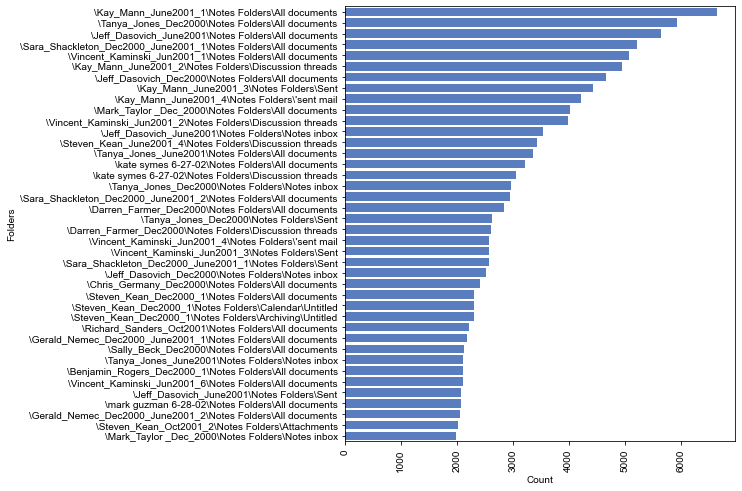

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataframe containing counts of every word in the emails dataframe
email_count = emails["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)

In [10]:
williams = emails[emails["employee"] == "williams-w3"]
williams["X-Folder"].value_counts()[:8]

\ExMerge - Williams III, Bill\Schedule Crawler             1398
\Williams III, Bill (Non-Privileged)\Bill Williams III     1022
\ExMerge - Williams III, Bill\Sent Items                    519
\ExMerge - Williams III, Bill\Inbox                         137
\ExMerge - Williams III, Bill\HR                             86
\ExMerge - Williams III, Bill\SymesEES                       81
\ExMerge - Williams III, Bill\Human Resources                45
\ExMerge - Williams III, Bill\Operations Committee/ISAS      19
Name: X-Folder, dtype: int64

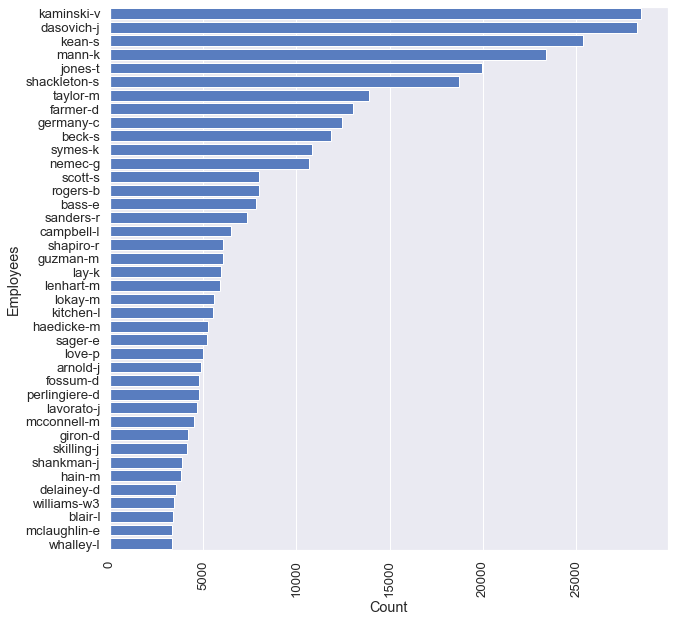

In [11]:
import matplotlib.pyplot as plt
mail_count = emails["employee"].value_counts()
indices = mail_count.index
count = pd.DataFrame(mail_count)
count.rename(columns = {"employee": "Count"}, inplace = True)
count["Employees"] = indices
barplot(df = count[:40], X = "Count", Y = "Employees", figsize = (10, 10), color = 'b', orient = 'h', ylabel = "Employees", xlabel = "Count", font_scale = .8, rotation = 90)

In [12]:
# Convert date column to datetime 
emails["Date"] = pd.to_datetime(emails["Date"])
print(emails.iloc[:1]["Date"])

0    2001-05-14 16:39:00-07:00
Name: Date, dtype: object


In [13]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if item == None or item == '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders      
emails["X-Folder"] = preprocess_folder(emails["X-Folder"])   

Folder cleaned!


In [14]:
# Folders we can filter out
unwanted_folders = ["all documents", "deleted items", "discussion threads", "sent", "deleted Items", "inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
emails = emails.loc[~emails['X-Folder'].isin(unwanted_folders)]
print(emails.iloc[:15]["X-Folder"].value_counts())


straw                   8
2000 conference         3
contacts                2
active international    1
avaya                   1
Name: X-Folder, dtype: int64


In [15]:
email_count = dict(emails["employee"].value_counts())
reduced_emails = [key for key, val in email_count.items() if val >= 2000]
emails = emails.loc[emails['employee'].isin(reduced_emails)]
print(emails["employee"].value_counts())

kean-s         5550
kaminski-v     4483
kitchen-l      4034
farmer-d       3786
williams-w3    2775
lokay-m        2554
taylor-m       2477
shapiro-r      2036
beck-s         2013
Name: employee, dtype: int64


In [16]:
emails.isnull().sum()
emails.dropna(inplace = True)
#print("Rows with missing values have been removed")
emails.isnull().sum()

file            0
message         0
Message-Body    0
X-From          0
employee        0
Date            0
Subject         0
X-To            0
X-Folder        0
dtype: int64

In [17]:
def tokenize(row):
    if row == None or row == '':
        tokens = ""
    else:
        tokens = row.split(" ")
    return tokens

In [18]:
import re

def remove_reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', " ", token)
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

In [19]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dvija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def assemble_bag(data):
    data = data.apply(tokenize)
    #data = data.apply(stop_word_removal)
    data = data.apply(remove_reg_expressions)
    
    unique_tokens = []
    single_tokens = []

    for item in data:
        for token in item:
            if token in single_tokens:
                if token not in unique_tokens:
                    unique_tokens.append(token)
            else:
                single_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = unique_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in unique_tokens:
                df.iloc[i][token] += 1    
    return df

In [21]:
employee = emails[emails["employee"] == "kaminski-v"]

In [22]:
def remove_folders(emails, n):
    # Returns the folders containing more than 'n' number of e-mails
    email_count = dict(emails["X-Folder"].value_counts())
    small_folders = [key for key, val in email_count.items() if val <= n]
    emails = emails.loc[~emails['X-Folder'].isin(small_folders)]
    return emails
n = 200
employee = remove_folders(employee, n)

In [23]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    class_le = LabelEncoder()
    # apply label encoder on the `Folder` column
    y = class_le.fit_transform(df['X-Folder'])
    df.loc[:,'y'] = y
    return df
label_encoder(employee)    
print("Randomly selected labels representing our folders")
unique_folders = employee["y"].unique()
print (unique_folders)

Randomly selected labels representing our folders
[1 2 4 0 3 5 6]


In [24]:
def sort(df):   
    df = df.sort_values(by = "Date", axis = 0)
    return df
employee = sort(employee)
print(display(employee.loc[:,("Date", "y", "X-Folder")][:10]))

,Date,y,X-Folder
210435,1999-12-10 06:43:00-08:00,2,management
209880,1999-12-10 09:17:00-08:00,1,ene_ect
221267,1999-12-10 10:46:00-08:00,5,resumes
210434,1999-12-12 07:22:00-08:00,2,management
210433,1999-12-13 02:08:00-08:00,2,management
210431,1999-12-13 23:51:00-08:00,2,management
210685,1999-12-14 00:17:00-08:00,2,management
210684,1999-12-14 00:22:00-08:00,2,management
211067,1999-12-14 02:14:00-08:00,4,projects
210683,1999-12-14 02:46:00-08:00,2,management


None


In [25]:
def prepare_features(df):
    from_bag = assemble_bag(df["X-From"])
    to_bag = assemble_bag(df["X-To"])
    message_bag = assemble_bag(df["Message-Body"])
    subject_bag = assemble_bag(df["Subject"])
    frames = [from_bag, subject_bag, to_bag, message_bag]
    X = pd.concat(frames, axis = 1, join = 'inner')
    X.drop(labels = [" ", ""], inplace = True, axis = 1)
    return X
X = prepare_features(employee)

In [71]:
print(display(X))
y = X["y"]
X.drop("y", axis = 1)
print(X["y"])
print("A peek into some of the columns in the features dataframe")

,shirley,crenshaw,kevin,g,moore,office,of,the,chairman,enron,...,easo,change energy,formatting,incorrectly,worksheets,you please,pm to kaminski,prepare,work it,maria
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2865,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,1,0,1,0,0,0
2866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
2867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


None
      y  y
0     0  0
1     0  0
2     0  0
3     0  0
4     0  0
...  .. ..
2864  0  0
2865  0  0
2866  0  0
2867  0  0
2868  0  0

[2869 rows x 2 columns]
A peek into some of the columns in the features dataframe


In [73]:
from sklearn.linear_model import LogisticRegression
def split_data(X, employee):
    # split data into training and testing sets
    training_size = int(len(employee) * 0.8)
    X_train = X[:training_size]
    X_test = X[training_size:]
    y_test = employee[training_size:]["y"]
    y_train = employee[:training_size]["y"]
    return X_train, X_test, y_test, training_size
X_train, X_test, y_test, training_size = split_data(X, employee)

In [176]:
from numpy.random import randint
import numpy as np

def fit(df, training_size, X_train):
    models = {}
    filtered_folders = []
    unique_folders = df["y"].unique()
    model = LogisticRegression()
    for folder in unique_folders:
        y_train = df[:training_size]["y"] == folder
        X_row = X_train[0:500]
        X_final = X_row[0:32]
        Y_row = y_train[0:500]
        Y_final = Y_row[0:32]
        model.fit(X_train[1000:1025], y_train[1000:1025])
        models[folder] = model
        filtered_folders.append(folder)
    testing_probs = pd.DataFrame(columns = filtered_folders)
    for folder in filtered_folders:
        # Compute probability
        testing_probs[folder] = models[folder].predict_proba(X_test)[:,1]
    y_test_pred = testing_probs.idxmax(axis = 1)
    return models, filtered_folders, model, y_test_pred
models, filtered_folders, model, y_test_pred = fit(employee, training_size, X_train)

In [200]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score(y_test[0:574], y_test_pred2)
f1_score(y_test[0:574], y_test_pred, average='micro')

0.9041811846689896